In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_table("/content/drive/MyDrive/BigData/Data/Reg_Log_NaoRenovacao_SeguroAuto.txt")
df.head()

,Nao_Renovou,Renda,Reclamacoes,Educacao,Tempo_cliente,Classe_idade,Idade_carro,Debito_autom
0,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao
1,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao
2,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,02_26 a 35,01_Zero,01_Nao
3,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,04_>55,02_1 a 3 anos,01_Nao
4,1,02_Entre R$ 2001 e R$ 5000,04_>5,03_Curso superior,02_1 a 3 anos,03_36 a 55,04_7 a 9 anos,01_Nao


In [ ]:
df.shape

(2143, 8)

In [ ]:
df.dtypes

Nao_Renovou       int64
Renda            object
Reclamacoes      object
Educacao         object
Tempo_cliente    object
Classe_idade     object
Idade_carro      object
Debito_autom     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nao_Renovou    2143 non-null   int64 
 1   Renda          2143 non-null   object
 2   Reclamacoes    2143 non-null   object
 3   Educacao       2143 non-null   object
 4   Tempo_cliente  2143 non-null   object
 5   Classe_idade   2143 non-null   object
 6   Idade_carro    2143 non-null   object
 7   Debito_autom   2143 non-null   object
dtypes: int64(1), object(7)
memory usage: 134.1+ KB


In [ ]:
df.isnull()

,Nao_Renovou,Renda,Reclamacoes,Educacao,Tempo_cliente,Classe_idade,Idade_carro,Debito_autom
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2138,False,False,False,False,False,False,False,False
2139,False,False,False,False,False,False,False,False
2140,False,False,False,False,False,False,False,False
2141,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Nao_Renovou      0
Renda            0
Reclamacoes      0
Educacao         0
Tempo_cliente    0
Classe_idade     0
Idade_carro      0
Debito_autom     0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]

Nao_Renovou      0.0
Renda            0.0
Reclamacoes      0.0
Educacao         0.0
Tempo_cliente    0.0
Classe_idade     0.0
Idade_carro      0.0
Debito_autom     0.0
dtype: float64

In [ ]:
df.describe()

,Nao_Renovou
count,2143.000000
mean,0.458236
std,0.498369
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df["Nao_Renovou"].value_counts()

0    1161
1     982
Name: Nao_Renovou, dtype: int64

In [ ]:
df.describe(include="object")

,Renda,Reclamacoes,Educacao,Tempo_cliente,Classe_idade,Idade_carro,Debito_autom
count,2143,2143,2143,2143,2143,2143,2143
unique,3,4,4,3,4,5,2
top,01_Ate R$ 2000,03_3 a 5,02_Ensino Medio,03_>3 anos,03_36 a 55,01_Zero,01_Nao
freq,909,738,756,774,919,556,1594


In [ ]:
df["Idade_carro"].value_counts()

01_Zero          556
02_1 a 3 anos    424
03_4 a 6 anos    424
04_7 a 9 anos    416
05_>=10 anos     323
Name: Idade_carro, dtype: int64

In [ ]:
df["Educacao"].value_counts()

02_Ensino Medio          756
03_Curso superior        549
04_Pos-graduacao         433
01_Ensino Fundamental    405
Name: Educacao, dtype: int64

In [ ]:
(df["Educacao"].value_counts()/df.shape[0])*100

02_Ensino Medio          35.277648
03_Curso superior        25.618292
04_Pos-graduacao         20.205320
01_Ensino Fundamental    18.898740
Name: Educacao, dtype: float64

In [ ]:
round(df["Educacao"].value_counts()/df.shape[0]*100,2)

02_Ensino Medio          35.28
03_Curso superior        25.62
04_Pos-graduacao         20.21
01_Ensino Fundamental    18.90
Name: Educacao, dtype: float64

In [ ]:
pd.crosstab(df["Renda"], df["Nao_Renovou"])

Nao_Renovou,0,1
Renda,,
01_Ate R$ 2000,774,135
02_Entre R$ 2001 e R$ 5000,252,495
03_>R$ 5000,135,352


In [ ]:
renda_nao_renovou= pd.crosstab(df["Renda"], df["Nao_Renovou"], normalize="index").reset_index()

In [ ]:
renda_nao_renovou

Nao_Renovou,Renda,0,1
0,01_Ate R$ 2000,0.851485,0.148515
1,02_Entre R$ 2001 e R$ 5000,0.337349,0.662651
2,03_>R$ 5000,0.277207,0.722793


In [ ]:
renda_nao_renovou.columns.to_list()

['Renda', 0, 1]

<Axes: xlabel='Renda', ylabel='0'>

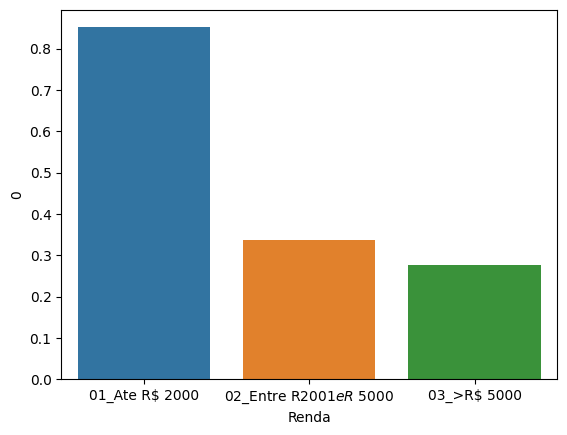

In [ ]:
sns.barplot(data=renda_nao_renovou, x="Renda", y=0)

<Axes: xlabel='Renda', ylabel='1'>

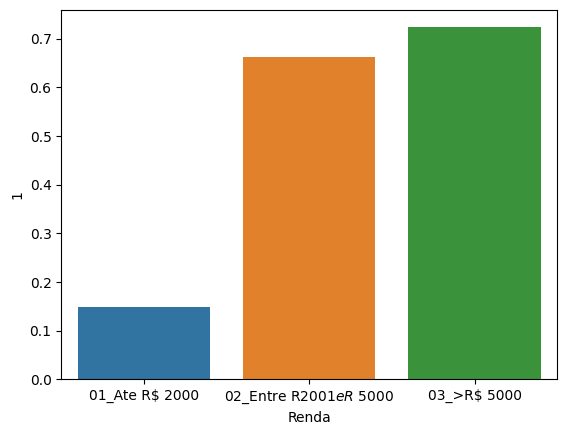

In [ ]:
sns.barplot(data=renda_nao_renovou, x="Renda", y=1)

Text(0, 0.5, 'Renovou')

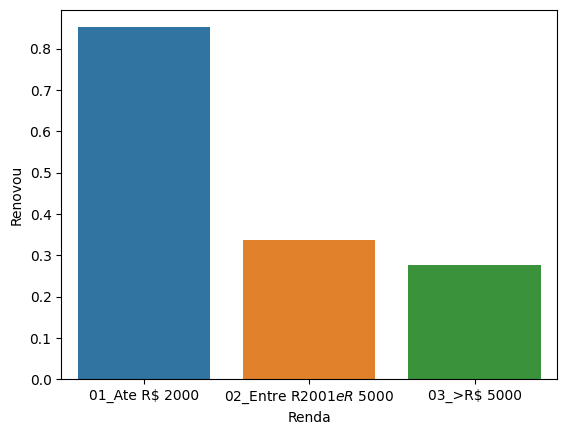

In [ ]:
ax= sns.barplot(data=renda_nao_renovou, x="Renda", y=0)
ax.set_xlabel("Renda")
ax.set_ylabel("Renovou")

In [ ]:
reclamacao_nao_renovou= pd.crosstab(df["Reclamacoes"], df["Nao_Renovou"], normalize="index").reset_index()

In [ ]:
reclamacao_nao_renovou

Nao_Renovou,Reclamacoes,0,1
0,01_Nenhuma,0.890909,0.109091
1,02_Ate 3,0.757576,0.242424
2,03_3 a 5,0.268293,0.731707
3,04_>5,0.227848,0.772152


<Axes: xlabel='Reclamacoes', ylabel='0'>

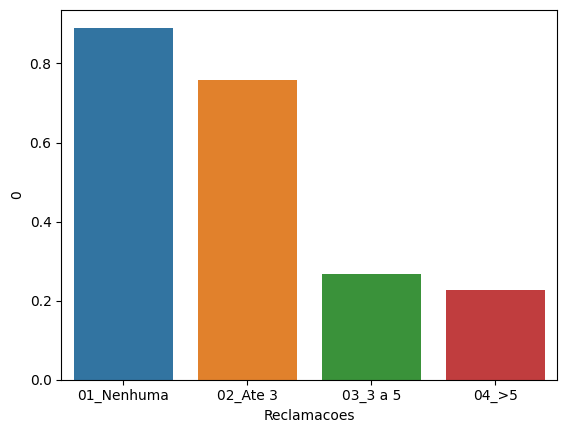

In [ ]:
sns.barplot(data=reclamacao_nao_renovou, x="Reclamacoes", y=0)

<Axes: xlabel='Reclamacoes', ylabel='1'>

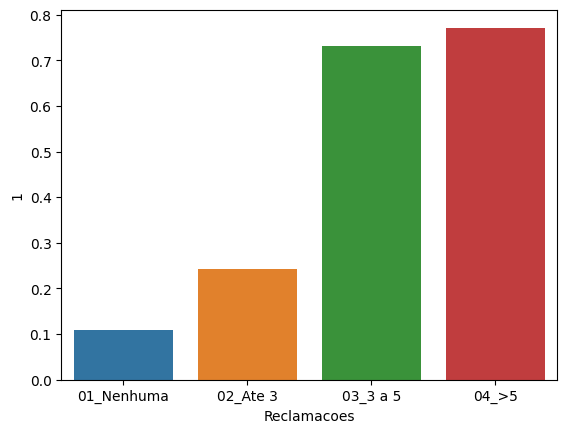

In [ ]:
sns.barplot(data=reclamacao_nao_renovou, x="Reclamacoes", y=1)

Text(0, 0.5, 'Renovou')

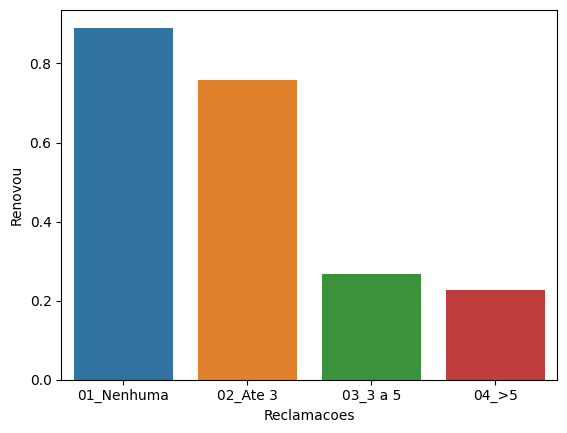

In [ ]:
ax= sns.barplot(data=reclamacao_nao_renovou, x="Reclamacoes", y=0)
ax.set_xlabel("Reclamacoes")
ax.set_ylabel("Renovou")

Text(0, 0.5, 'Renovou')

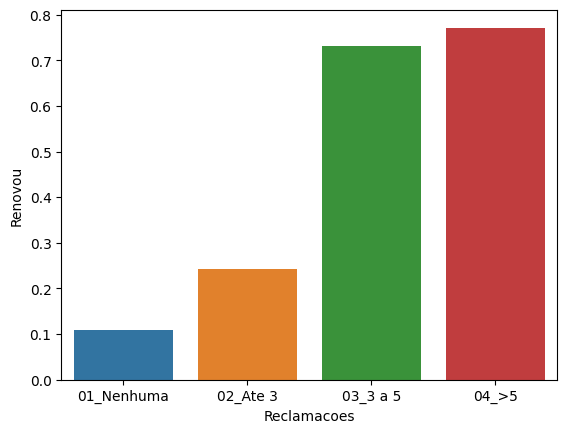

In [ ]:
ax= sns.barplot(data=reclamacao_nao_renovou, x="Reclamacoes", y=1)
ax.set_xlabel("Reclamacoes")
ax.set_ylabel("Renovou")

#Modelo de Regressão


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df.columns.to_list()

['Nao_Renovou',
 'Renda',
 'Reclamacoes',
 'Educacao',
 'Tempo_cliente',
 'Classe_idade',
 'Idade_carro',
 'Debito_autom']

In [ ]:
modelo= smf.glm(formula = "Nao_Renovou ~ Renda+Reclamacoes+Educacao+Tempo_cliente+Classe_idade+Idade_carro+Debito_autom",
                data=df,
                family= sm.families.Binomial()).fit()

In [ ]:
print(modelo.summary2())

                         Results: Generalized linear model
Model:                      GLM                    AIC:                  664.8488   
Link Function:              Logit                  BIC:                  -15664.1505
Dependent Variable:         Nao_Renovou            Log-Likelihood:       -313.42    
Date:                       2023-06-02 01:54       LL-Null:              -1477.9    
No. Observations:           2143                   Deviance:             626.85     
Df Model:                   18                     Pearson chi2:         838.       
Df Residuals:               2124                   Scale:                1.0000     
Method:                     IRLS                                                    
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------------
Interc

In [ ]:
modelo.fittedvalues

0       0.999938
1       0.999938
2       0.998441
3       0.999969
4       0.997560
          ...   
2138    0.498253
2139    0.217828
2140    0.000508
2141    0.116677
2142    0.000520
Length: 2143, dtype: float64